# Esercizio 11.1

### Rete neurale a singolo neurone

In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import optimizers, losses, metrics
from tensorflow.keras.optimizers import Adagrad, Adadelta

m = 2 
b = 1 

def NN_1(N_tr, N_ep, sigma):

    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, N_tr)
    x_valid = np.random.uniform(-1, 1, 10)
    x_valid.sort()
    y_target = m * x_valid + b 

    y_train = np.random.normal(m * x_train + b, sigma) 
    y_valid = np.random.normal(m * x_valid + b, sigma)

    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_ep, verbose = 0,
              shuffle=True, validation_data=(x_valid, y_valid))
    
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

    return score[0], model.get_weights()[0][0], model.get_weights()[1][0]


### Comportamento all'aumentare di N_train

Il fit dei dati viene ripetuto per set di dati di training che variano da 100 a 2000 elementi, mantenendo fisso il numero di epoche (30) e in assenza di rumore.

Aumentando il numero di dati di training oltre 1500 il miglioramento non è più apprezzabile:

N_train =  100      Loss =  0.22295036911964417
N_train =  200      Loss =  0.15370289981365204
N_train =  300      Loss =  0.05385200306773186
N_train =  400      Loss =  0.006409859750419855
N_train =  500      Loss =  0.000807115517091006
N_train =  600      Loss =  0.0006729717715643346
N_train =  700      Loss =  9.962231706595048e-05
N_train =  800      Loss =  2.7453988877823576e-05
N_train =  900      Loss =  1.0951230251521338e-05
N_train =  1000      Loss =  7.0409269028459676e-06
N_train =  1100      Loss =  3.950723055368144e-07
N_train =  1200      Loss =  5.286065061227418e-07
N_train =  1300      Loss =  8.983365518133724e-08
N_train =  1400      Loss =  1.0612604128823477e-08
N_train =  1500      Loss =  8.370895088205543e-10
N_train =  1600      Loss =  6.83032186366006e-10
N_train =  1700      Loss =  6.705824229236157e-10
N_train =  1800      Loss =  9.783760607229297e-11
N_train =  1900      Loss =  8.624922824551629e-12


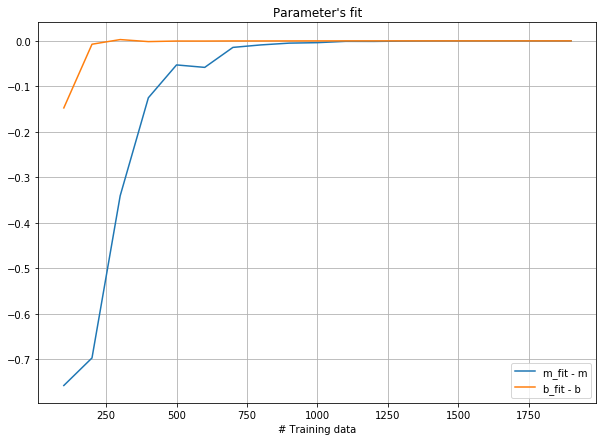

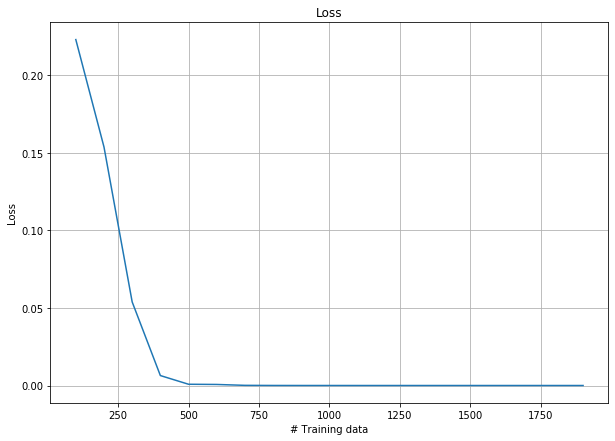

In [74]:
N_train = np.arange(100, 2000, 100)
N_epochs = 30
noise = 0

n = len(N_train)
m_fit = np.zeros(n)
b_fit = np.zeros(n)
loss = np.zeros(n)

for i in range(n):
    loss[i], m_fit[i], b_fit[i] = NN_1(N_train[i], N_epochs, noise) 
    print("N_train = ",N_train[i],"     Loss = ",loss[i])
    
        
plt.figure(figsize=(10,7))
plt.title("Parameter's fit")
plt.plot(N_train, m_fit - m, label='m_fit - m')
plt.plot(N_train, b_fit - b, label='b_fit - b')
plt.xlabel('# Training data')
plt.legend(loc='best')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,7))
plt.title("Loss")
plt.plot(N_train, loss)
plt.grid(True)
plt.xlabel('# Training data')
plt.ylabel('Loss')
plt.show()

### Comportamento all'aumentare di N_epochs

Il fit dei dati viene ripetuto per numero di epoche che varia da 30 a 270, mantenendo fisso il numero di dati di training (100) e in assenza di rumore.

Anche in questo caso si osserva un netto miglioramento all'aumentare delle epoche.

Tuttavia l'aumentare del numero epoche ha un forte impatto sul tempo di esecuzione, rendendo le esecuzioni per numero di epoche superiore a 200 eccessivamente onerose (considerata la banalità del compito che sta eseguendo).

N_epochs =  30      Loss =  0.6760280728340149
N_epochs =  60      Loss =  0.047094304114580154
N_epochs =  90      Loss =  0.02587440051138401
N_epochs =  120      Loss =  0.002718662843108177
N_epochs =  150      Loss =  0.001339174690656364
N_epochs =  180      Loss =  0.00019581837113946676
N_epochs =  210      Loss =  7.15833380127151e-07
N_epochs =  240      Loss =  1.8781344124363386e-06
N_epochs =  270      Loss =  2.1365594875533134e-06


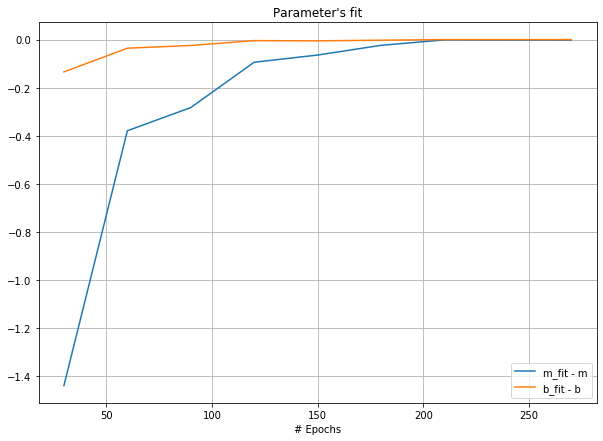

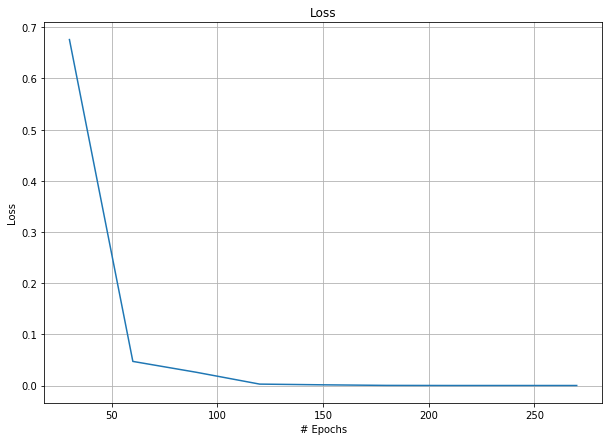

In [75]:
N_train = 100
N_epochs = np.arange(30, 300, 30)
noise = 0

n = len(N_epochs)
m_fit = np.zeros(n)
b_fit = np.zeros(n)
loss = np.zeros(n)

for i in range(n):
    loss[i], m_fit[i], b_fit[i] = NN_1(N_train, N_epochs[i], noise) 
    print("N_epochs = ",N_epochs[i],"     Loss = ",loss[i])
    
        
plt.figure(figsize=(10,7))
plt.title("Parameter's fit")
plt.plot(N_epochs, m_fit - m, label='m_fit - m')
plt.plot(N_epochs, b_fit - b, label='b_fit - b')
plt.xlabel('# Epochs')
plt.legend(loc='best')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,7))
plt.title("Loss")
plt.plot(N_epochs, loss)
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

### Comportamento in presenza di  rumore

Prendendo dunque N_train=1500 e N_epochs=200 per essere certi di avere una rete performante, vediamo quanto questa riesca a mantenere buoni risultati in presenza di rumore.

I dati sono dunque sporcati con un rumore gaussiano con deviazione standard tre 0.1 e 1. 
La rete risulta incredibilmente stabile, riuscendo a mantenere un buon fit (deviazione massima del 1% circa) anche in presenza di un rumore estremamente elevato (confrontabile con il valore dei dati stessi!).


Noise =  0.1      Loss =  0.009178800508379936
Noise =  0.2      Loss =  0.03686565160751343
Noise =  0.30000000000000004      Loss =  0.08283083140850067
Noise =  0.4      Loss =  0.14764603972434998
Noise =  0.5      Loss =  0.23010306060314178
Noise =  0.6      Loss =  0.33127492666244507
Noise =  0.7000000000000001      Loss =  0.45173636078834534
Noise =  0.8      Loss =  0.5896769165992737
Noise =  0.9      Loss =  0.7462860345840454


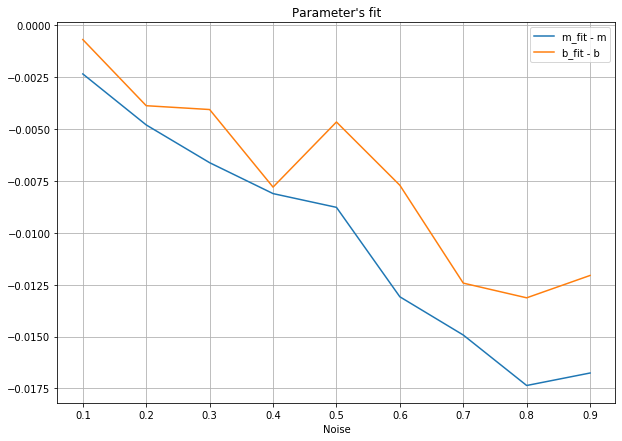

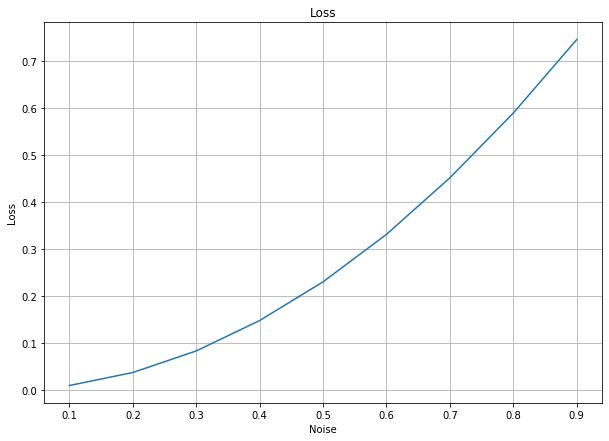

In [76]:
N_train = 1500
N_epochs = 200
noise = np.arange(0.1,1,0.1)

n = len(noise)
m_fit = np.zeros(n)
b_fit = np.zeros(n)
loss = np.zeros(n)

for i in range(n):
    loss[i], m_fit[i], b_fit[i] = NN_1(N_train, N_epochs, noise[i]) 
    print("Noise = ",noise[i],"     Loss = ",loss[i])
    
        
plt.figure(figsize=(10,7))
plt.title("Parameter's fit")
plt.plot(noise, m_fit - m, label='m_fit - m')
plt.plot(noise, b_fit - b, label='b_fit - b')
plt.xlabel('Noise')
plt.legend(loc='best')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,7))
plt.title("Loss")
plt.plot(noise, loss)
plt.xlabel('Noise')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Esercizio 11.2

Test di varie reti neurali per il fit della funzione $f(x)=4-3x-2x^2+3x^3$ nell'intervallo $x \in [-1,1]$.

In [62]:
a=3
b=-2
c=-3
d=4

def f(x):
    return a*x**3 + b*x**2 + c*x + d

def NN(dep, wid, act, opt, los):
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, 1000)
    x_valid = np.random.uniform(-1, 1, 10)
    x_valid.sort()

    y_train = np.random.normal(f(x_train), 0.1) 
    y_valid = np.random.normal(f(x_valid), 0.1)

    model = tf.keras.Sequential()
    model.add(Dense(wid, input_shape=(1,), activation=act))
    for i in range(dep-1):
        model.add(Dense(wid, activation=act))
    model.add(Dense(1))
    model.compile(optimizer=opt, loss=los, metrics=[los])

    model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, verbose=1,
            shuffle=True, validation_data=(x_valid, y_valid))

    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    
    print('Test loss:', score[0])
    
    x_plot = np.random.uniform(-1, 1, 100)
    x_plot.sort()
    y_predicted = model.predict(x_plot)
    y_target = f(x_plot)
    #plt.scatter(x_train, y_train, label='Training set')
    #plt.scatter(x_valid, y_valid, label='Validation set')
    plt.scatter(x_plot, y_predicted,color='r', label='Prediction')
    plt.plot(x_plot, y_target, label='Target function')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
    return model

Ho iniziato a sperimentare con la **rete più semplice possibile**: un solo layer nascosto composto da due neuroni.

Come funzione di attivazione ho deciso di testare la **elu**, poichè tra le funzioni di attivazione standard è quella che si avvicina di più alle caratteristiche del modello che si vuole fittare (liscia e a codominio illimitato).

Questa rete presenta un **comportamento instabile**, il risultato dipende fortemente dal set di parametri iniziali che vengono generati. Infatti sebbene in alcune run riesca a produrre un risultato, in altre è possibile ottenere modelli molto diversi dall'obbiettivo. 

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8473 - mse: 5.8473 - val_loss: 1.2974 - val_mse: 1.2974
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5262 - mse: 1.5262 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0918 - mse: 1.0918 - val_loss: 0.8544 - val_mse: 0.8544
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9529 - mse: 0.9529 - val_loss: 0.8252 - val_mse: 0.8252
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8186 - mse: 0.8186 - val_loss: 0.8042 - val_mse: 0.8042
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6720 - mse: 0.6720 - val_loss: 0.7845 - val_mse: 0.7845
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5325 - mse: 0.5325 - val_loss: 0.7991 - val_mse: 0.7991
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4440 - m

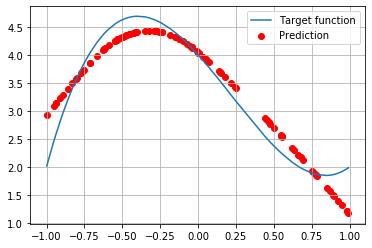

In [71]:
Depth = 1
Width = 2
Activation = 'elu'
Optimizer = 'sgd'
Loss = 'mse'
    
model = NN(Depth, Width, Activation, Optimizer, Loss)

La scelta iniziale della elu come funzione di attivazione si è rivelata azzeccata. Provando infatti con altre funzioni di attivazione ci si rende immediatamente conto che da una rete così semplice emergono in modo preponderante le caratteristiche indesiderate delle altre funzioni.

Come ad esempio la **non derivabilità della relu**:

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 7.2214 - mse: 7.2214 - val_loss: 2.7498 - val_mse: 2.7498
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2401 - mse: 3.2401 - val_loss: 1.4425 - val_mse: 1.4425
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.9093 - mse: 1.9093 - val_loss: 0.9718 - val_mse: 0.9718
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.3216 - mse: 1.3216 - val_loss: 0.8244 - val_mse: 0.8244
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9974 - mse: 0.9974 - val_loss: 0.7050 - val_mse: 0.7050
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7580 - mse: 0.7580 - val_loss: 0.6838 - val_mse: 0.6838
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5815 - mse: 0.5815 - val_loss: 0.6960 - val_mse: 0.6960
Epoch 8/100
32/32 [==============================] - ETA: 0s - loss: 0.4812 - mse: 

Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1188 - mse: 0.1188 - val_loss: 0.3393 - val_mse: 0.3393
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1165 - mse: 0.1165 - val_loss: 0.3384 - val_mse: 0.3384
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1146 - mse: 0.1146 - val_loss: 0.3249 - val_mse: 0.3249
Epoch 66/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1122 - mse: 0.1122 - val_loss: 0.3333 - val_mse: 0.3333
Epoch 67/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1107 - mse: 0.1107 - val_loss: 0.3146 - val_mse: 0.3146
Epoch 68/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1083 - mse: 0.1083 - val_loss: 0.2991 - val_mse: 0.2991
Epoch 69/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1068 - mse: 0.1068 - val_loss: 0.3009 - val_mse: 0.3009
Epoch 70/100
32/32 [==============================] - 0s 1ms/step - loss: 0.

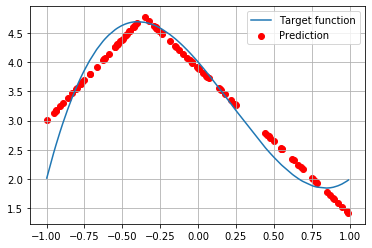

In [65]:
Depth = 1
Width = 2
Activation = 'relu'
Optimizer = 'sgd'
Loss = 'mse'
    
model = NN(Depth, Width, Activation, Optimizer, Loss)

E la **limitatezza della sigmoide** (risultati molto simili si ottengono anche con altre funzioni a codominio $[0,1]$, e.g. softmax, softsign...) :

Test loss: 0.951508641242981


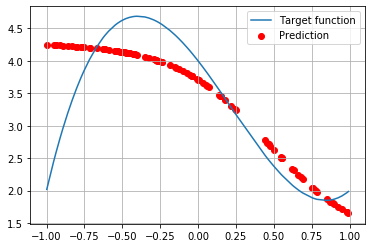

In [39]:
Depth = 1
Width = 2
Activation = 'sigmoid'
Optimizer = 'sgd'
Loss = 'mse'
    
model = NN(Depth, Width, Activation, Optimizer, Loss)

Tuttavia inaspettatamente le **funzioni a codominio $[-1,1]$**, in particolare **tanh**, riescono a produrre risultati verosimili.

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 5.0439 - mse: 5.0439 - val_loss: 0.7637 - val_mse: 0.7637
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7743 - mse: 0.7743 - val_loss: 0.4107 - val_mse: 0.4107
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3831 - mse: 0.3831 - val_loss: 0.4714 - val_mse: 0.4714
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2801 - mse: 0.2801 - val_loss: 0.5253 - val_mse: 0.5253
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2458 - mse: 0.2458 - val_loss: 0.5529 - val_mse: 0.5529
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2290 - mse: 0.2290 - val_loss: 0.5542 - val_mse: 0.5542
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2173 - mse: 0.2173 - val_loss: 0.5467 - val_mse: 0.5467
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2079 - m

Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0958 - val_mse: 0.0958
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0919 - val_mse: 0.0919
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0912 - val_mse: 0.0912
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0839 - val_mse: 0.0839
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0878 - val_mse: 0.0878
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0831 - val_mse: 0.0831
Epoch 69/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0317 - mse: 0.0317 - val_loss: 0.0841 - val_mse: 0.0841
Epoch 70/100
32/32 [==============================] - 0s 1ms/step - loss: 0.

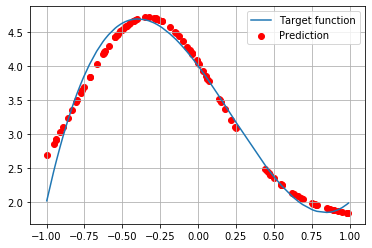

In [68]:
Depth = 1
Width = 2
Activation = 'tanh'
Optimizer = 'sgd'
Loss = 'mse'
    
model = NN(Depth, Width, Activation, Optimizer, Loss)

A questo punto il mio intento è stato quello di cercare di ottere un comportamento più stabile andando a **ampliare la rete in larghezza e profondità**. Ho quindi proceduto aumentando separatamente i due valori, fino a una massimo di 20. Ho notato che reti strette e profonde mantengono una instabilità simile alla rete iniziale. Mentre sono le reti larghe a portare al risultato sperato.

Dopo aver provato varie combinazioni ho deciso di proseguire con una rete composta da 5 layer di 20 neuroni ciascuno. Reti di dimensioni più elevate non sembrano portare a risultati sensibilmente migliori.

Mi sono tuttavia limitato a sperimentare solo con reti "*rettangolari*" (stessa larghezza su ogni layer).


Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4784 - mse: 1.4784 - val_loss: 1.0336 - val_mse: 1.0336
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4085 - mse: 0.4085 - val_loss: 1.0719 - val_mse: 1.0719
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3859 - mse: 0.3859 - val_loss: 1.1019 - val_mse: 1.1019
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3705 - mse: 0.3705 - val_loss: 0.7759 - val_mse: 0.7759
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3342 - mse: 0.3342 - val_loss: 0.8015 - val_mse: 0.8015
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2968 - mse: 0.2968 - val_loss: 0.5917 - val_mse: 0.5917
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2576 - mse: 0.2576 - val_loss: 0.7949 - val_mse: 0.7949
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2130 - m

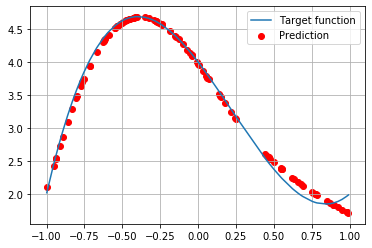

In [67]:
Depth = 5
Width = 20
Activation = 'elu'
Optimizer = 'sgd'
Loss = 'mse'
    
model = NN(Depth, Width, Activation, Optimizer, Loss)

**Riprovando a modificare la funzione di attivazione** sulla nuova rete ingrandita, si osserva che ora le irregolarità della **relu** vengono completamente assorbite dalla complessità della rete. Essa quindi si guadagna un posto tra le funzioni di attivazione adatte al compito, insieme a elu e tanh. La sigmoide si riconferma invece essere completamente inappropriata.

Ho poi voluto testare i **metodi di ottimizzazione a learning rate variabile**, ma si sono rivelati incredibilmente fallimentari quando applicati alla mia rete.

Per quanto riguarda **funzioni di costo** alternative, esse non sembrano portare a differenze facilmente apprezzabili.

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 10.7617 - mse: 10.7617 - val_loss: 7.7459 - val_mse: 7.7459
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 9.0417 - mse: 9.0417 - val_loss: 6.5348 - val_mse: 6.5348
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.6451 - mse: 7.6451 - val_loss: 5.4919 - val_mse: 5.4919
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3920 - mse: 6.3920 - val_loss: 4.5602 - val_mse: 4.5602
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.2553 - mse: 5.2553 - val_loss: 3.7345 - val_mse: 3.7345
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2368 - mse: 4.2368 - val_loss: 3.0398 - val_mse: 3.0398
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3616 - mse: 3.3616 - val_loss: 2.4916 - val_mse: 2.4916
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 2.6372 -

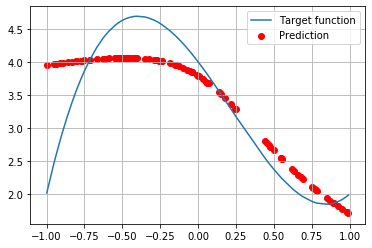

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 12.3354 - mse: 12.3354 - val_loss: 9.9599 - val_mse: 9.9599
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 12.3246 - mse: 12.3246 - val_loss: 9.9497 - val_mse: 9.9497
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 12.3135 - mse: 12.3135 - val_loss: 9.9396 - val_mse: 9.9396
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 12.3023 - mse: 12.3023 - val_loss: 9.9293 - val_mse: 9.9293
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 12.2908 - mse: 12.2908 - val_loss: 9.9187 - val_mse: 9.9187
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 12.2791 - mse: 12.2791 - val_loss: 9.9079 - val_mse: 9.9079
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 12.2672 - mse: 12.2672 - val_loss: 9.8968 - val_mse: 9.8968
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - lo

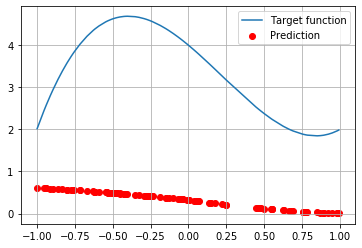

In [66]:
Depth = 5
Width = 20
Activation = 'elu'
Optimizer = 'Adagrad'
Loss = 'mse'
    
model = NN(Depth, Width, Activation, Optimizer, Loss)

Optimizer = 'Adadelta'
model = NN(Depth, Width, Activation, Optimizer, Loss)

Infine sono andato a testare il modello ottenuto al di fuori dei limiti del set su cui lo ho allenato. E si... effettivamente è terribile.

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 2.0047 - mse: 2.0047 - val_loss: 1.2934 - val_mse: 1.2934
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3986 - mse: 0.3986 - val_loss: 0.9374 - val_mse: 0.9374
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3599 - mse: 0.3599 - val_loss: 0.8024 - val_mse: 0.8024
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3094 - mse: 0.3094 - val_loss: 0.6836 - val_mse: 0.6836
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2546 - mse: 0.2546 - val_loss: 0.6884 - val_mse: 0.6884
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1999 - mse: 0.1999 - val_loss: 0.5306 - val_mse: 0.5306
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1527 - mse: 0.1527 - val_loss: 0.2423 - val_mse: 0.2423
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1161 - m

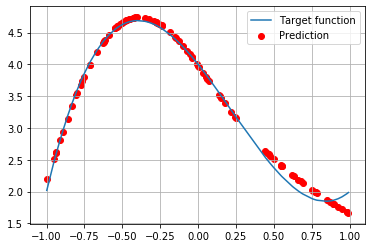

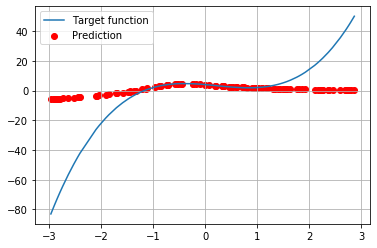

In [72]:
Depth = 5
Width = 20
Activation = 'elu'
Optimizer = 'sgd'
Loss = 'mse'
    
model = NN(Depth, Width, Activation, Optimizer, Loss)

x_plot = np.random.uniform(-3, 3, 100)
x_plot.sort()
y_predicted = model.predict(x_plot)
y_target = f(x_plot)
#plt.scatter(x_train, y_train, label='Training set')
#plt.scatter(x_valid, y_valid, label='Validation set')
plt.scatter(x_plot, y_predicted,color='r', label='Prediction')
plt.plot(x_plot, y_target, label='Target function')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Esercizio 11.3

$f(x,y) = \sin(x^2+y^2)$   con   $(x,y) \in [-3/2,3/2] \times [-3/2,3/2]$

Partendo dalla rete costruita nell'ersercizio precedente e modificandone l'input, è stato sufficiente aumentare il numero di dati del set di training per ottenere un risultato soddisfacente.

La necessità di avere più dati e dovuta al fatto che il dominio da cui questi vengono presi è più "*grande*", e quindi servono più dati per avere un campione sufficientemente raprresentativo.

Epoch 1/100
313/313 [==============================] - 0s 859us/step - loss: 0.1769 - mse: 0.1769 - val_loss: 0.3194 - val_mse: 0.3194
Epoch 2/100
313/313 [==============================] - 0s 795us/step - loss: 0.1649 - mse: 0.1649 - val_loss: 0.3081 - val_mse: 0.3081
Epoch 3/100
313/313 [==============================] - 0s 759us/step - loss: 0.1635 - mse: 0.1635 - val_loss: 0.3313 - val_mse: 0.3313
Epoch 4/100
313/313 [==============================] - 0s 772us/step - loss: 0.1628 - mse: 0.1628 - val_loss: 0.3249 - val_mse: 0.3249
Epoch 5/100
313/313 [==============================] - 0s 736us/step - loss: 0.1623 - mse: 0.1623 - val_loss: 0.3383 - val_mse: 0.3383
Epoch 6/100
313/313 [==============================] - 0s 755us/step - loss: 0.1613 - mse: 0.1613 - val_loss: 0.3362 - val_mse: 0.3362
Epoch 7/100
313/313 [==============================] - 0s 697us/step - loss: 0.1609 - mse: 0.1609 - val_loss: 0.3295 - val_mse: 0.3295
Epoch 8/100
313/313 [==============================] - 

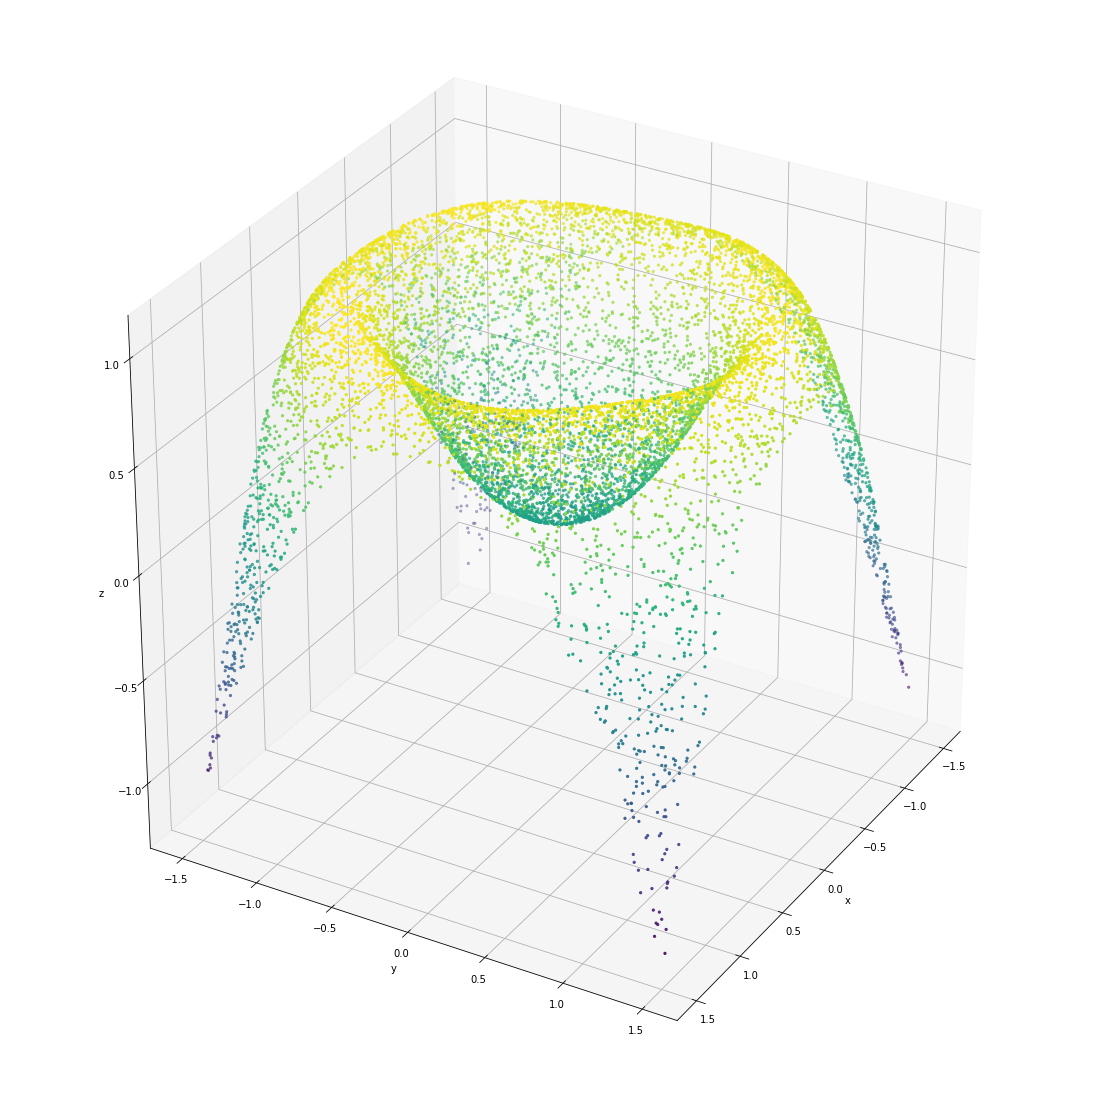

In [256]:
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline


def f(x,y):
    return math.sin(x**2+y**2)

dep = 5
wid = 20
act = 'tanh'
opt = 'sgd'
los = 'mse'

np.random.seed(0)
x_train = np.random.uniform(-3/2, 3/2, 10000)
y_train = np.random.uniform(-3/2, 3/2, 10000)
x_valid = np.random.uniform(-3/2, 3/2, 100)
y_valid = np.random.uniform(-3/2, 3/2, 100)
x_valid.sort()
y_valid.sort()

r_train = np.zeros((len(x_train),2))
r_valid = np.zeros((len(x_valid),2))
z_train=np.zeros(len(x_train))
z_valid=np.zeros(len(x_valid))

for i in range(len(x_train)):
    z_train[i] = np.random.normal(f(x_train[i], y_train[i]), 0.1)
    r_train[i,0] = x_train[i]
    r_train[i,1] = y_train[i]
for i in range(len(x_valid)):
    z_valid[i] = np.random.normal(f(x_valid[i], y_valid[i]), 0.1)
    r_valid[i,0] = x_valid[i]
    r_valid[i,1] = y_valid[i]

    
model = tf.keras.Sequential()
model.add(Dense(wid, input_shape=(2,), activation=act))
for i in range(dep-1):
    model.add(Dense(wid, activation=act))
model.add(Dense(1))
model.compile(optimizer=opt, loss=los, metrics=[los])

model.fit(x=r_train, y=z_train, batch_size=32, epochs=100, validation_data=(r_valid, z_valid))

score = model.evaluate(r_valid, z_valid, batch_size=32)
 
print()
print('Test loss:', score[0])
    
x = np.random.uniform(-3/2, 3/2, 10000)
y = np.random.uniform(-3/2, 3/2, 10000)
z_target = np.zeros(len(x))
r = np.zeros((len(x),2))

for i in range(len(x)):    
    r[i,0]=x[i]
    r[i,1]=y[i]
    
z_predicted = model.predict(r)

for i in range(len(x)):
    z_target[i] = f(x[i],y[i]) 

fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
ax.scatter(x, y, z_predicted[:,0], c=z_predicted[:,0], marker='.')
#ax.plot_trisurf(x, y, z_target)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 30)
plt.show()
  